In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [14]:
# Download training dataset
dataset = MNIST(root='data/',download=True)

In [15]:
len(dataset)

60000

In [16]:
test_dataset = MNIST(root ='data/', train=False)
len(test_dataset)

10000

In [17]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x12E8DDBE0>, 5)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


Label: 5


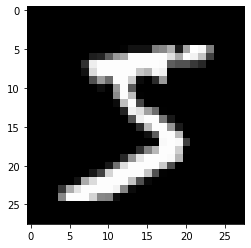

In [19]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:',label)

Label: 3


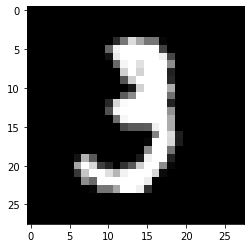

In [20]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:',label)

In [21]:
import torchvision.transforms as transforms

In [22]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', train=True, transform = transforms.ToTensor())

In [23]:
img_tensor, label = dataset[0]
print(img_tensor.shape,  label)

torch.Size([1, 28, 28]) 5


In [24]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


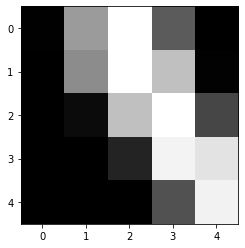

In [25]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

In [26]:
from torch.utils.data import random_split


In [27]:
train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [43]:
from torch.utils.data import DataLoader

In [44]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)
train_loader,val_loader

(<torch.utils.data.dataloader.DataLoader at 0x1353e5610>,
 <torch.utils.data.dataloader.DataLoader at 0x1353e5c40>)

In [29]:
# Install the library
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project='03-logistic-regression-live')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "erfq1031/03-logistic-regression-live" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/erfq1031/03-logistic-regression-live


'https://jovian.ai/erfq1031/03-logistic-regression-live'

In [30]:
import torch.nn as nn
input_size =28*28
num_classes = 10
#Logistic regression model
model = nn.Linear(input_size, num_classes)

In [31]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0133, -0.0164, -0.0336,  ..., -0.0229,  0.0042, -0.0099],
        [ 0.0222,  0.0313,  0.0212,  ..., -0.0351, -0.0302,  0.0095],
        [ 0.0003, -0.0148,  0.0106,  ..., -0.0312, -0.0019,  0.0005],
        ...,
        [-0.0119, -0.0106, -0.0240,  ...,  0.0087, -0.0049,  0.0244],
        [-0.0175,  0.0151, -0.0170,  ...,  0.0177, -0.0095,  0.0311],
        [-0.0211,  0.0058,  0.0245,  ..., -0.0204, -0.0183,  0.0227]],
       requires_grad=True)

In [44]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0120,  0.0047, -0.0210, -0.0339,  0.0137, -0.0159,  0.0240, -0.0129,
        -0.0140,  0.0212], requires_grad=True)

In [45]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs =model(images)
    print(outputs)
    break

tensor([9, 6, 1, 8, 8, 0, 8, 5, 4, 4, 0, 8, 7, 4, 1, 9, 2, 4, 3, 9, 0, 8, 9, 7,
        6, 9, 3, 2, 4, 1, 1, 3, 2, 1, 5, 7, 7, 5, 0, 3, 7, 2, 8, 5, 4, 4, 3, 1,
        0, 4, 2, 0, 2, 1, 4, 3, 0, 1, 1, 4, 0, 2, 3, 6, 8, 6, 9, 7, 1, 2, 2, 7,
        1, 3, 8, 4, 2, 2, 0, 3, 3, 6, 6, 8, 1, 4, 0, 4, 9, 0, 3, 7, 0, 9, 8, 4,
        2, 7, 3, 5, 5, 1, 7, 3, 8, 0, 2, 3, 6, 1, 4, 5, 3, 0, 3, 3, 5, 0, 3, 3,
        8, 4, 9, 5, 8, 8, 4, 4])
torch.Size([128, 1, 28, 28])
tensor([[-0.2057, -0.2250,  0.1791,  ...,  0.0562,  0.0843, -0.3169],
        [ 0.0582, -0.0443,  0.0499,  ..., -0.2249, -0.0513, -0.1257],
        [-0.4337,  0.3466,  0.3103,  ...,  0.0988,  0.1146,  0.0579],
        ...,
        [-0.3766, -0.0758,  0.1884,  ..., -0.0210, -0.3045, -0.0431],
        [-0.2142, -0.0705, -0.0309,  ...,  0.0713, -0.0742, -0.0267],
        [-0.1633,  0.0416, -0.0713,  ..., -0.0402, -0.0909, -0.0605]],
       grad_fn=<AddmmBackward>)


In [46]:
images.shape

torch.Size([128, 1, 28, 28])

In [47]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [48]:
class Person:
    # Class constructor
    def __init__(self,name,age):
        self.name = name
        self.age = age
        
    # Method
    def say_hello(self):
        print("Hello my name is "+ self.name +"!")

In [49]:
bob = Person("Bob",32)

In [49]:
bob.name, bob.age

('Bob', 32)

In [50]:
bob.say_hello()

Hello my name is Bob!


In [51]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
model=MnistModel()

In [52]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [39]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0131,  0.0076,  0.0154,  ...,  0.0182,  0.0327,  0.0349],
         [-0.0119, -0.0096, -0.0235,  ..., -0.0292, -0.0145,  0.0129],
         [ 0.0121,  0.0200,  0.0112,  ..., -0.0176,  0.0047,  0.0039],
         ...,
         [ 0.0001,  0.0349, -0.0190,  ..., -0.0235,  0.0351, -0.0279],
         [ 0.0030,  0.0188,  0.0178,  ...,  0.0195,  0.0164,  0.0277],
         [-0.0339, -0.0112, -0.0191,  ...,  0.0176, -0.0139,  0.0044]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0041, -0.0276,  0.0017,  0.0153, -0.0257, -0.0271, -0.0323,  0.0186,
         -0.0118,  0.0025], requires_grad=True)]

In [53]:
for images ,labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
print("outputs.shape:", outputs.shape)
print("Sample outputs:\n",outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape: torch.Size([128, 10])
Sample outputs:
 tensor([[ 0.1895, -0.0692,  0.1455,  0.0535, -0.1664, -0.0478, -0.2977, -0.0237,
         -0.2696, -0.2878],
        [-0.1666,  0.1661,  0.1724, -0.1836, -0.3242,  0.1005, -0.1958, -0.2124,
         -0.3318, -0.4492]])


In [54]:
import torch.nn.functional as F

In [55]:
outputs[:2]

tensor([[ 0.1895, -0.0692,  0.1455,  0.0535, -0.1664, -0.0478, -0.2977, -0.0237,
         -0.2696, -0.2878],
        [-0.1666,  0.1661,  0.1724, -0.1836, -0.3242,  0.1005, -0.1958, -0.2124,
         -0.3318, -0.4492]], grad_fn=<SliceBackward>)

In [56]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum:",torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1288, 0.0994, 0.1232, 0.1124, 0.0902, 0.1016, 0.0791, 0.1040, 0.0814,
         0.0799],
        [0.0955, 0.1332, 0.1341, 0.0939, 0.0816, 0.1248, 0.0928, 0.0912, 0.0810,
         0.0720]])
Sum: 1.0000001192092896


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using torch.max, which returns each row's largest element and the corresponding index.

In [57]:
max_probs, preds = torch.max(probs, dim =1)
print(preds)
print(max_probs)

tensor([0, 2, 5, 1, 0, 3, 1, 5, 1, 0, 0, 1, 7, 1, 2, 5, 3, 1, 7, 0, 1, 1, 2, 3,
        2, 7, 1, 5, 6, 1, 1, 1, 1, 1, 5, 9, 2, 5, 1, 3, 1, 7, 1, 1, 1, 1, 3, 1,
        7, 3, 1, 1, 1, 0, 3, 0, 1, 3, 2, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 2, 7, 5, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 1, 1, 0,
        7, 1, 1, 1, 1, 3, 1, 2, 0, 2, 7, 1, 5, 1, 0, 1, 3, 3, 3, 1, 1, 2, 5, 7,
        3, 7, 5, 2, 5, 7, 2, 5])
tensor([0.1288, 0.1341, 0.1314, 0.1438, 0.1384, 0.1355, 0.1373, 0.1264, 0.1299,
        0.1285, 0.1352, 0.1216, 0.1223, 0.1338, 0.1114, 0.1165, 0.1424, 0.1273,
        0.1312, 0.1250, 0.1514, 0.1485, 0.1197, 0.1519, 0.1324, 0.1133, 0.1202,
        0.1232, 0.1312, 0.1351, 0.1732, 0.1499, 0.1407, 0.1152, 0.1192, 0.1334,
        0.1233, 0.1258, 0.1337, 0.1293, 0.1396, 0.1395, 0.1291, 0.1199, 0.1187,
        0.1332, 0.1272, 0.1543, 0.1215, 0.1238, 0.1267, 0.1318, 0.1640, 0.1400,
        0.1331, 0.1246, 0.1284, 0.1239, 0.1176, 0.1199, 0.1330, 0.1163, 0.1485,
       

In [58]:
labels


tensor([2, 6, 6, 2, 1, 4, 8, 8, 1, 2, 1, 4, 6, 2, 1, 4, 2, 0, 5, 7, 5, 9, 1, 3,
        8, 9, 3, 2, 4, 3, 0, 7, 9, 7, 6, 0, 4, 4, 5, 0, 8, 8, 7, 1, 2, 1, 0, 4,
        3, 1, 1, 9, 8, 7, 2, 1, 2, 3, 2, 6, 1, 5, 4, 4, 8, 3, 7, 6, 5, 9, 4, 4,
        9, 7, 9, 3, 7, 6, 7, 0, 0, 9, 2, 3, 9, 5, 0, 1, 5, 6, 6, 2, 4, 5, 0, 5,
        7, 0, 1, 0, 3, 2, 4, 0, 9, 6, 3, 1, 2, 8, 1, 8, 7, 5, 2, 3, 8, 2, 4, 6,
        4, 7, 6, 2, 6, 3, 3, 8])

Evaluation Metric and Loss Function

In [59]:
outputs[:2]

tensor([[ 0.1895, -0.0692,  0.1455,  0.0535, -0.1664, -0.0478, -0.2977, -0.0237,
         -0.2696, -0.2878],
        [-0.1666,  0.1661,  0.1724, -0.1836, -0.3242,  0.1005, -0.1958, -0.2124,
         -0.3318, -0.4492]], grad_fn=<SliceBackward>)

In [60]:
torch.sum(preds == labels)

tensor(15)

In [61]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item()/ len(preds))

In [62]:
accuracy(outputs, labels)

tensor(0.1172)

In [63]:
probs

tensor([[0.1288, 0.0994, 0.1232,  ..., 0.1040, 0.0814, 0.0799],
        [0.0955, 0.1332, 0.1341,  ..., 0.0912, 0.0810, 0.0720],
        [0.1141, 0.1166, 0.1102,  ..., 0.0843, 0.0653, 0.0898],
        ...,
        [0.1092, 0.1273, 0.0869,  ..., 0.1394, 0.0850, 0.0789],
        [0.0962, 0.1180, 0.1234,  ..., 0.1075, 0.0882, 0.1070],
        [0.0953, 0.1029, 0.0975,  ..., 0.1045, 0.0831, 0.1031]],
       grad_fn=<SoftmaxBackward>)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:
It's not a differentiable function. torch.max and == are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.
It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.


For these reasons, accuracy is often used as an evaluation metric for classification, but not as a loss function. A commonly used loss function for classification problems is the cross-entropy, which has the following formula:
cross-entropy
While it looks complicated, it's actually quite simple:
For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are [0.1, 0.3, 0.2, ...] and the correct label is 1, we pick the corresponding element 0.3 and ignore the rest.
Then, take the logarithm of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.
Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.
As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the torch.nn.functional package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [64]:
outputs


tensor([[ 0.1895, -0.0692,  0.1455,  ..., -0.0237, -0.2696, -0.2878],
        [-0.1666,  0.1661,  0.1724,  ..., -0.2124, -0.3318, -0.4492],
        [-0.0150,  0.0071, -0.0494,  ..., -0.3167, -0.5724, -0.2546],
        ...,
        [ 0.1161,  0.2696, -0.1124,  ...,  0.3603, -0.1342, -0.2094],
        [-0.0433,  0.1607,  0.2055,  ...,  0.0672, -0.1298,  0.0631],
        [-0.1422, -0.0655, -0.1193,  ..., -0.0504, -0.2792, -0.0629]],
       grad_fn=<AddmmBackward>)

In [65]:
loss_fn=F.cross_entropy

In [66]:
# Loss for current batch of data
loss= loss_fn(outputs, labels)
print(loss)

tensor(2.3604, grad_fn=<NllLossBackward>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. 2.23 is look at e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average. The lower the loss, The better the model.

Training the model
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
        
        
        # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection


In [101]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer =opt_func(model.parameters(),lr)
    history =[]
    
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss =model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history
        

Let's define the evaluate function, used in the validation phase of fit

In [68]:
l1 =[1,2,3,4,5]

In [69]:
l2=[x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [102]:
def evaluate(model, val_loader):
    outputs =[ model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [83]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        

In [84]:
def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    

In [85]:
def training_step(self, batch):
        images, labels = batch
        out = self (images)   # Generate predictions
        loss = F.cross_entropy(out, labels)# Calculate loss
        return loss
    

In [ ]:
def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

In [86]:
def validation_step(self, batch):
        images, labels = batch
        out = self(images)# Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(out, labels) # Calculate loss
        return {'val_loss':loss, 'val_acc':acc}

In [87]:
 def validatin_epoch_end(self, ouputs):
        batch_losses = [x['val_loss'] for x in ouputs]
        epoch_loss =torch.stack(batch_losses).mean()# Combine losses
        batch_accs=[x['val_acc']for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()# Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    

In [ ]:
def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    

In [88]:
def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss:{:.4f}, val_acc:{:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        

In [89]:
model = MnistModel() 

In [92]:
result0 = evaluate(model, val_loader)
result0

ModuleAttributeError: 'MnistModel' object has no attribute 'validation_step'

In [79]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self (images)   # Generate predictions
        loss = F.cross_entropy(out, labels)# Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)# Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(out, labels) # Calculate loss
        return {'val_loss':loss, 'val_acc':acc}
    
    def validatin_epoch_end(self, ouputs):
        batch_losses = [x['val_loss'] for x in ouputs]
        epoch_loss =torch.stack(batch_losses).mean()# Combine losses
        batch_accs=[x['val_acc']for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()# Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss:{:.4f}, val_acc:{:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        
    
    
model = MnistModel()  
#This is mine

In [103]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()
#This is teacher.

In [106]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 1.2175005674362183, 'val_acc': 0.7846123576164246}

The initial accuracy is around 78%, which one might expect from a randomly initialized model (since it has a 78 in 100 chance of getting a label right by guessing randomly).
We are now ready to train the model. Let's train for five epochs and look at the results.

We are now ready to train the model. Let's train for five epochs and look at the results.

In [107]:
history1 = fit(5,0.001,model, train_loader, val_loader)
history1

Epoch [0], val_loss: 1.1263, val_acc: 0.7943
Epoch [1], val_loss: 1.0532, val_acc: 0.8040
Epoch [2], val_loss: 0.9932, val_acc: 0.8092
Epoch [3], val_loss: 0.9433, val_acc: 0.8152
Epoch [4], val_loss: 0.9010, val_acc: 0.8198


[{'val_loss': 1.1263443231582642, 'val_acc': 0.7943037748336792},
 {'val_loss': 1.053152084350586, 'val_acc': 0.8039952516555786},
 {'val_loss': 0.9932349324226379, 'val_acc': 0.8092365264892578},
 {'val_loss': 0.9432662725448608, 'val_acc': 0.8151701092720032},
 {'val_loss': 0.9009693264961243, 'val_acc': 0.8198180198669434}]

That's a great result! With just 5 epochs of training, our model has reached an accuracy of over 80% on the validation set. Let's see if we can improve that by training for a few more epochs. Try changing the learning rates and number of epochs in each of the cells below.

In [109]:
history2 = fit(5, 0.001, model, train_loader, val_loader)
history2

Epoch [0], val_loss: 0.7403, val_acc: 0.8403
Epoch [1], val_loss: 0.7227, val_acc: 0.8430
Epoch [2], val_loss: 0.7067, val_acc: 0.8450
Epoch [3], val_loss: 0.6921, val_acc: 0.8473
Epoch [4], val_loss: 0.6787, val_acc: 0.8492


[{'val_loss': 0.7402944564819336, 'val_acc': 0.8402887582778931},
 {'val_loss': 0.7226772308349609, 'val_acc': 0.8429588675498962},
 {'val_loss': 0.7066887617111206, 'val_acc': 0.8450356125831604},
 {'val_loss': 0.6921423673629761, 'val_acc': 0.8473101258277893},
 {'val_loss': 0.6787427663803101, 'val_acc': 0.8491891026496887}]

In [111]:
history3 = fit(5, 0.001, model, train_loader, val_loader)
history3

Epoch [0], val_loss: 0.6168, val_acc: 0.8566
Epoch [1], val_loss: 0.6088, val_acc: 0.8575
Epoch [2], val_loss: 0.6012, val_acc: 0.8588
Epoch [3], val_loss: 0.5941, val_acc: 0.8593
Epoch [4], val_loss: 0.5873, val_acc: 0.8601


[{'val_loss': 0.6168344020843506, 'val_acc': 0.8566060066223145},
 {'val_loss': 0.6087894439697266, 'val_acc': 0.8574960231781006},
 {'val_loss': 0.6011866927146912, 'val_acc': 0.858781635761261},
 {'val_loss': 0.5940598249435425, 'val_acc': 0.8592761158943176},
 {'val_loss': 0.5873123407363892, 'val_acc': 0.8600672483444214}]

In [113]:
history4 = fit(5, 0.001, model, train_loader, val_loader)
history4

Epoch [0], val_loss: 0.5535, val_acc: 0.8654
Epoch [1], val_loss: 0.5488, val_acc: 0.8658
Epoch [2], val_loss: 0.5443, val_acc: 0.8664
Epoch [3], val_loss: 0.5399, val_acc: 0.8667
Epoch [4], val_loss: 0.5358, val_acc: 0.8678


[{'val_loss': 0.5535272359848022, 'val_acc': 0.865407407283783},
 {'val_loss': 0.5487984418869019, 'val_acc': 0.8658030033111572},
 {'val_loss': 0.5442556142807007, 'val_acc': 0.8663963675498962},
 {'val_loss': 0.5399207472801208, 'val_acc': 0.8666930198669434},
 {'val_loss': 0.5357686877250671, 'val_acc': 0.867780864238739}]

While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph.

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

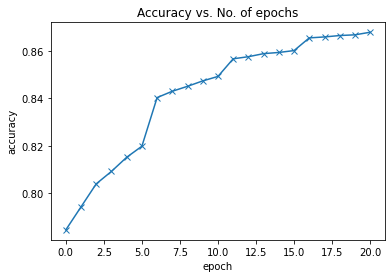

In [114]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [115]:
jovian.log_metrics(val_acc=history[-1]['val_acc'], val_loss=history[-1]['val_loss'])

[jovian] Metrics logged.


In [116]:
jovian.commit(project='03-logistic-regression', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "erfq1031/03-logistic-regression"
[jovian] Uploading notebook..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/erfq1031/03-logistic-regression


'https://jovian.ai/erfq1031/03-logistic-regression'

#Testing with individual images

In [118]:
# Define test dataset
test_dataset = MNIST(root ='data/',
                    train=False,
                    transform=transforms.ToTensor())
#Here's a sample image from the dataset.

Shape: torch.Size([1, 28, 28])
Label: 5


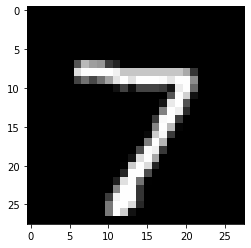

In [119]:
img, lavel = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Shape: torch.Size([1, 28, 28])
Label: 5


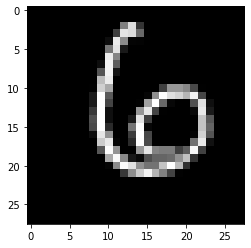

In [120]:
img, lavel = test_dataset[100]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Shape: torch.Size([1, 28, 28])
Label: 5


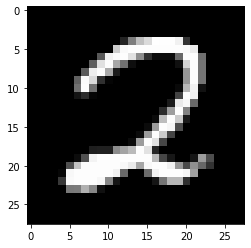

In [121]:
img, lavel = test_dataset[35]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Let's define a helper function predict_image, which returns the predicted label for a single image tensor

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

img.unsqueeze simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Label: 7 ,Predicted: 7


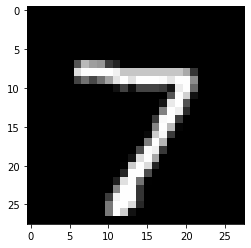

In [123]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ',Predicted:', predict_image(img, model))

Label: 0 ,Predicted: 0


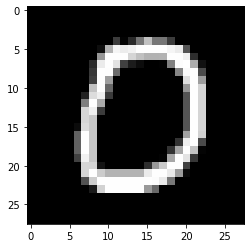

In [124]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ',Predicted:', predict_image(img, model))

Label: 9 ,Predicted: 3


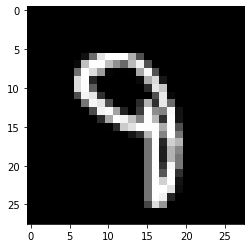

In [125]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ',Predicted:', predict_image(img, model))

Label: 9 ,Predicted: 9


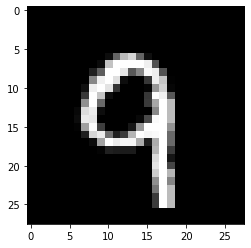

In [126]:
img, label = test_dataset[1812]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ',Predicted:', predict_image(img, model))

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [128]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5025011301040649, 'val_acc': 0.873730480670929}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

Saving and loading the model
Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights and bias matrices to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.


In [130]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model.

In [131]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0048, -0.0061, -0.0341,  ...,  0.0228,  0.0357, -0.0064],
                      [ 0.0288,  0.0318, -0.0270,  ...,  0.0065,  0.0027,  0.0213],
                      [ 0.0015,  0.0233, -0.0216,  ...,  0.0221,  0.0157,  0.0152],
                      ...,
                      [-0.0356, -0.0054, -0.0097,  ...,  0.0340, -0.0320,  0.0093],
                      [-0.0110, -0.0107,  0.0229,  ...,  0.0085,  0.0338, -0.0354],
                      [ 0.0295, -0.0063,  0.0138,  ..., -0.0252, -0.0128,  0.0059]])),
             ('linear.bias',
              tensor([-0.0763,  0.1373, -0.0190, -0.0197,  0.0515,  0.0842,  0.0121,  0.0417,
                      -0.1411, -0.0188]))])

In [134]:
model2=MnistModel()

In [135]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0185,  0.0221, -0.0146,  ...,  0.0345, -0.0243, -0.0127],
                      [ 0.0145, -0.0211, -0.0355,  ..., -0.0010,  0.0179,  0.0056],
                      [ 0.0326,  0.0246,  0.0206,  ..., -0.0276, -0.0033, -0.0328],
                      ...,
                      [ 0.0121, -0.0293, -0.0156,  ...,  0.0183, -0.0008,  0.0127],
                      [ 0.0315, -0.0241, -0.0322,  ..., -0.0042, -0.0023, -0.0023],
                      [-0.0082, -0.0217,  0.0308,  ...,  0.0148, -0.0270, -0.0070]])),
             ('linear.bias',
              tensor([ 7.3112e-03, -8.6759e-03,  3.3866e-02,  3.2157e-05, -2.1306e-02,
                      -1.5435e-02, -3.2582e-03, -3.2993e-03, -1.3263e-02,  1.2714e-02]))])

In [136]:
evaluate(model2, test_loader)

{'val_loss': 2.3554160594940186, 'val_acc': 0.04960937425494194}

In [137]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0048, -0.0061, -0.0341,  ...,  0.0228,  0.0357, -0.0064],
                      [ 0.0288,  0.0318, -0.0270,  ...,  0.0065,  0.0027,  0.0213],
                      [ 0.0015,  0.0233, -0.0216,  ...,  0.0221,  0.0157,  0.0152],
                      ...,
                      [-0.0356, -0.0054, -0.0097,  ...,  0.0340, -0.0320,  0.0093],
                      [-0.0110, -0.0107,  0.0229,  ...,  0.0085,  0.0338, -0.0354],
                      [ 0.0295, -0.0063,  0.0138,  ..., -0.0252, -0.0128,  0.0059]])),
             ('linear.bias',
              tensor([-0.0763,  0.1373, -0.0190, -0.0197,  0.0515,  0.0842,  0.0121,  0.0417,
                      -0.1411, -0.0188]))])

let's verify that this model has the same loss and accuracy on the test set as before.

In [138]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.5025011301040649, 'val_acc': 0.873730480670929}

In [139]:
jovian.commit(project='03-logistic-regression', environment=None, outputs=['mnist-logistic.pth'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "erfq1031/03-logistic-regression" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/erfq1031/03-logistic-regression


'https://jovian.ai/erfq1031/03-logistic-regression'